<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detetion/blob/main/Models_BERT_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import json
import numpy as np 
import time
import joblib

In [4]:
df_1 = pd.read_csv('drive/MyDrive/pan-2021/first-5000-bert-emb.csv')
df_2 = pd.read_csv('drive/MyDrive/pan-2021/train-5000-7300-bert.csv')
df_3 = pd.read_csv('drive/MyDrive/pan-2021/train-from-7300-bert.csv')

df = pd.concat([df_1, df_2, df_3])

In [5]:
df

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-10702,"[50.449974060058594, 2.697402238845825, 14.426...","[1, 1, 1, 0, 1]",1,2,"[1, 2, 1, 2, 2, 1]"
1,1,problem-10706,"[50.037479400634766, -24.617265701293945, 1.43...","[0, 1, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 4, 3, 2]"
2,2,problem-10710,"[38.54051971435547, 14.400163650512695, 6.9886...","[1, 1, 0, 1, 0, 1]",1,4,"[1, 2, 3, 3, 4, 4, 3]"
3,3,problem-10712,"[71.1371078491211, -0.6726647019386292, 17.260...","[0, 0, 0, 0, 1, 1]",1,2,"[1, 1, 1, 1, 1, 2, 1]"
4,4,problem-10708,"[42.75421142578125, 3.8431107997894287, 3.0734...","[1, 0, 0, 0, 1]",1,3,"[1, 2, 2, 2, 2, 3]"
...,...,...,...,...,...,...,...
3895,3895,problem-207,"[55.4754524230957, -7.976742744445801, 3.05340...","[1, 0, 0]",1,2,"[1, 2, 2, 2]"
3896,3896,problem-211,"[70.7889404296875, 2.030505418777466, -0.37436...","[0, 0, 1, 0, 1, 0, 0]",1,3,"[1, 1, 1, 2, 2, 3, 3, 3]"
3897,3897,problem-208,"[65.77025604248047, 1.8704386949539185, -1.180...","[1, 1, 0, 0, 1]",1,2,"[1, 2, 1, 1, 1, 2]"
3898,3898,problem-217,"[54.963741302490234, 0.9973352551460266, 16.82...","[1, 1, 1]",1,3,"[1, 2, 3, 2]"


In [6]:
df = df.drop(["Unnamed: 0","file_name", "changes", "authors", "paragraph_authors"], axis="columns")

In [7]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation_bert.csv')
df_valid.head()

,Unnamed: 0,file_name,emb,changes,multi_author,authors,paragraph_authors
0,0,problem-1899,"[49.12980651855469, -1.5622761249542236, 14.18...","[0, 1, 1, 1, 1, 1, 0, 1]",1,4,"[1, 1, 2, 3, 1, 4, 3, 3, 1]"
1,1,problem-1906,"[61.219879150390625, -5.509589195251465, 29.22...","[1, 0, 1]",1,3,"[1, 2, 2, 3]"
2,2,problem-1903,"[44.21048355102539, -6.232966423034668, 26.735...","[1, 1, 1, 1, 0, 0]",1,3,"[1, 2, 3, 1, 3, 3, 3]"
3,3,problem-1900,"[44.55337905883789, -5.841452598571777, 13.936...","[1, 1, 1, 1, 1]",1,4,"[1, 2, 1, 3, 4, 2]"
4,4,problem-1904,"[53.226463317871094, 6.5912981033325195, 16.66...","[0, 1, 1, 0, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 3, 1, 2, 4, 1]"


In [8]:
df_valid = df_valid.drop(["Unnamed: 0","file_name", "changes", "authors", "paragraph_authors"], axis="columns")

In [9]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11200
2400


In [11]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[50.449974060058594, 2.697402238845825, 14.426..."
1,"[50.037479400634766, -24.617265701293945, 1.43..."
2,"[38.54051971435547, 14.400163650512695, 6.9886..."
3,"[71.1371078491211, -0.6726647019386292, 17.260..."
4,"[42.75421142578125, 3.8431107997894287, 3.0734..."
5,"[55.965675354003906, -10.863653182983398, 21.1..."
6,"[57.53012466430664, 3.316451072692871, 24.9135..."
7,"[65.28244018554688, 8.659195899963379, 22.4455..."
8,"[55.271812438964844, -7.61473274230957, 11.138..."
9,"[54.49051284790039, -3.902076482772827, -1.088..."


In [12]:
y_test = df_test['multi_author']
df_test.drop(['multi_author'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[49.12980651855469, -1.5622761249542236, 14.18..."
1,"[61.219879150390625, -5.509589195251465, 29.22..."
2,"[44.21048355102539, -6.232966423034668, 26.735..."
3,"[44.55337905883789, -5.841452598571777, 13.936..."
4,"[53.226463317871094, 6.5912981033325195, 16.66..."
5,"[128.64418029785156, -9.34257984161377, 13.457..."
6,"[54.58216094970703, -9.10063648223877, 20.0652..."
7,"[51.603538513183594, -8.352190017700195, 15.29..."
8,"[41.43244934082031, 4.549075603485107, 8.16766..."
9,"[24.141916275024414, -0.02147524617612362, 11...."


In [13]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [133]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [15]:
xtrain = np.asarray(xtrain)

In [16]:
X_test = np.asarray(X_test)

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [19]:
ytrain = y_train

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.37      0.38      0.38       600
           1       0.79      0.78      0.79      1800

    accuracy                           0.68      2400
   macro avg       0.58      0.58      0.58      2400
weighted avg       0.69      0.68      0.68      2400



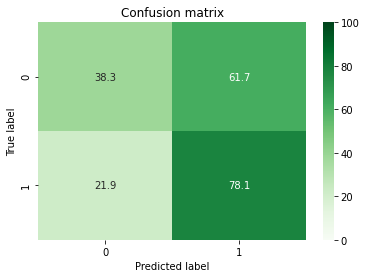

In [115]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       600
           1       0.80      0.81      0.81      1800

    accuracy                           0.71      2400
   macro avg       0.60      0.60      0.60      2400
weighted avg       0.70      0.71      0.70      2400



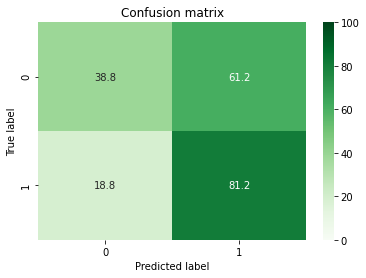

In [116]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.64      0.22      0.32       600
           1       0.79      0.96      0.86      1800

    accuracy                           0.77      2400
   macro avg       0.71      0.59      0.59      2400
weighted avg       0.75      0.77      0.73      2400



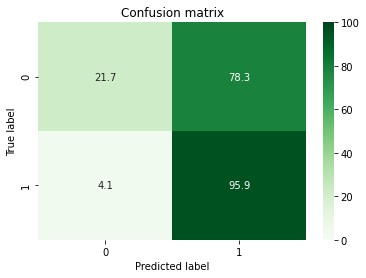

In [120]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

Best score: 0.761
Best parameters set:
	 bootstrap: True
	 criterion: 'gini'
	 max_depth: 5
	 max_features: None
	 max_samples: 0.5
	 min_samples_leaf: 5
	 min_samples_split: 2
	 n_estimators: 100
	 oob_score: True
	 random_state: None
accuracy:  0.7591666666666667
              precision    recall  f1-score   support

           0       0.64      0.08      0.14       600
           1       0.76      0.98      0.86      1800

    accuracy                           0.76      2400
   macro avg       0.70      0.53      0.50      2400
weighted avg       0.73      0.76      0.68      2400



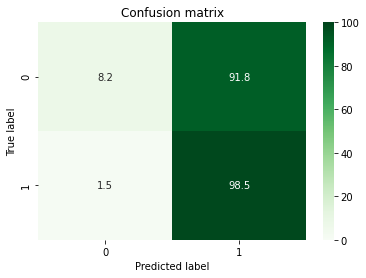

In [35]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

# print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test, ["0", "1"])

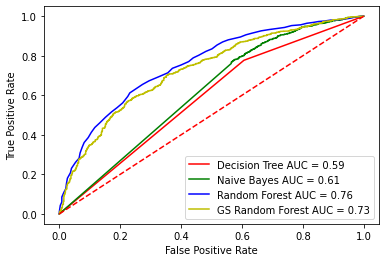

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]
random_forest_prob_1 = [p[1] for p in gs_rf.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

gs_rf_false_pos, gs_rf_true_pos, _ = roc_curve(actual, random_forest_prob_1)
gs_rf_auc = auc(gs_rf_false_pos, gs_rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)
plt.plot(gs_rf_false_pos, gs_rf_true_pos, 'y', label='GS Random Forest AUC = %0.2f'% gs_rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X_train_norm = xtrain
X_test_norm = X_test

In [40]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [41]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [42]:
train_pool = Pool(data=xtrain,label = ytrain)

In [43]:
import sklearn.metrics as metrics

In [70]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.22657277323256128}}


              precision    recall  f1-score   support

           0       0.66      0.30      0.41       600
           1       0.80      0.95      0.87      1800

    accuracy                           0.79      2400
   macro avg       0.73      0.62      0.64      2400
weighted avg       0.77      0.79      0.76      2400

Accuracy: 0.7866666666666666


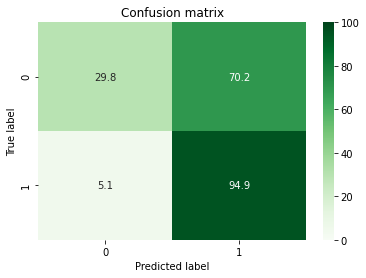

In [71]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

Learning rate:  0.5
              precision    recall  f1-score   support

           0       0.57      0.29      0.38       600
           1       0.80      0.93      0.86      1800

    accuracy                           0.77      2400
   macro avg       0.68      0.61      0.62      2400
weighted avg       0.74      0.77      0.74      2400



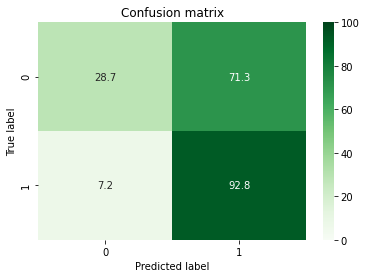

Learning rate:  0.75
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       600
           1       0.80      0.91      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.66      0.60      0.61      2400
weighted avg       0.73      0.76      0.73      2400



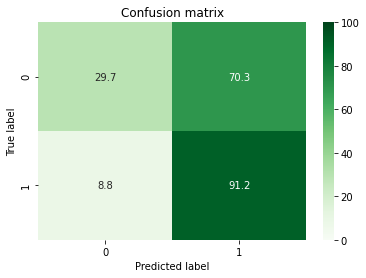

Learning rate:  1
              precision    recall  f1-score   support

           0       0.49      0.31      0.38       600
           1       0.79      0.89      0.84      1800

    accuracy                           0.75      2400
   macro avg       0.64      0.60      0.61      2400
weighted avg       0.72      0.75      0.73      2400



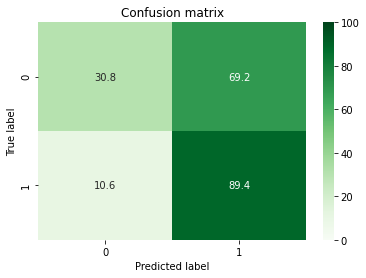

Learning rate:  1.1
              precision    recall  f1-score   support

           0       0.50      0.34      0.41       600
           1       0.80      0.89      0.84      1800

    accuracy                           0.75      2400
   macro avg       0.65      0.61      0.62      2400
weighted avg       0.73      0.75      0.73      2400



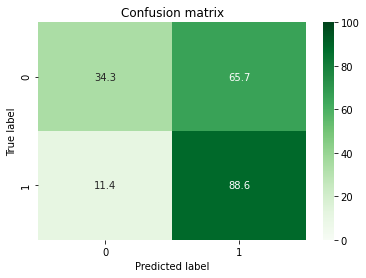

Learning rate:  1.2
              precision    recall  f1-score   support

           0       0.48      0.31      0.38       600
           1       0.79      0.89      0.84      1800

    accuracy                           0.74      2400
   macro avg       0.64      0.60      0.61      2400
weighted avg       0.72      0.74      0.72      2400



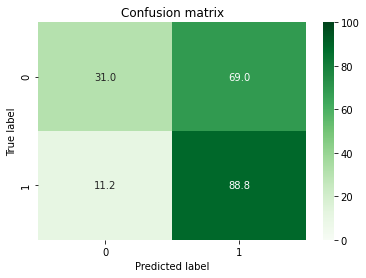

Learning rate:  1.3
              precision    recall  f1-score   support

           0       0.48      0.35      0.41       600
           1       0.80      0.87      0.84      1800

    accuracy                           0.74      2400
   macro avg       0.64      0.61      0.62      2400
weighted avg       0.72      0.74      0.73      2400



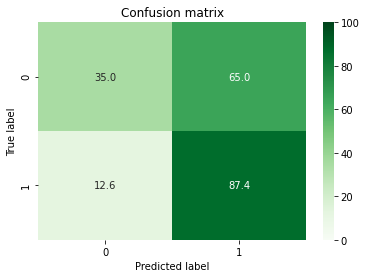

Learning rate:  1.4
              precision    recall  f1-score   support

           0       0.46      0.34      0.39       600
           1       0.80      0.86      0.83      1800

    accuracy                           0.73      2400
   macro avg       0.63      0.60      0.61      2400
weighted avg       0.71      0.73      0.72      2400



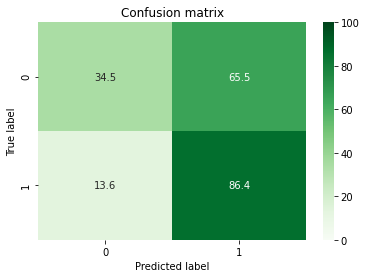

Learning rate:  1.5
              precision    recall  f1-score   support

           0       0.44      0.31      0.37       600
           1       0.79      0.87      0.83      1800

    accuracy                           0.73      2400
   macro avg       0.62      0.59      0.60      2400
weighted avg       0.70      0.73      0.71      2400



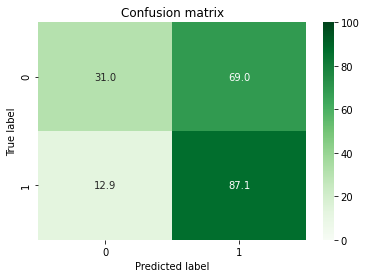

Learning rate:  2
              precision    recall  f1-score   support

           0       0.38      0.35      0.36       600
           1       0.79      0.81      0.80      1800

    accuracy                           0.69      2400
   macro avg       0.58      0.58      0.58      2400
weighted avg       0.69      0.69      0.69      2400



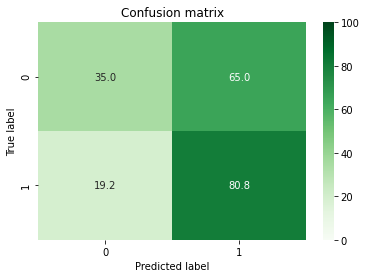

Learning rate:  3
              precision    recall  f1-score   support

           0       0.29      0.39      0.33       600
           1       0.77      0.68      0.72      1800

    accuracy                           0.60      2400
   macro avg       0.53      0.53      0.52      2400
weighted avg       0.65      0.60      0.62      2400



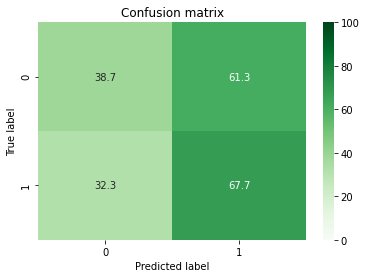

Learning rate:  4
              precision    recall  f1-score   support

           0       0.28      0.33      0.30       600
           1       0.76      0.72      0.74      1800

    accuracy                           0.62      2400
   macro avg       0.52      0.53      0.52      2400
weighted avg       0.64      0.62      0.63      2400



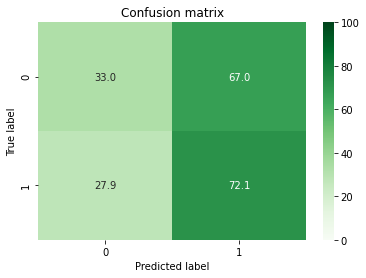

Learning rate:  5
              precision    recall  f1-score   support

           0       0.33      0.32      0.32       600
           1       0.77      0.78      0.78      1800

    accuracy                           0.67      2400
   macro avg       0.55      0.55      0.55      2400
weighted avg       0.66      0.67      0.66      2400



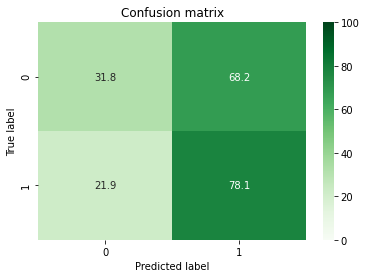

Learning rate:  6.3
              precision    recall  f1-score   support

           0       0.30      0.38      0.34       600
           1       0.77      0.70      0.74      1800

    accuracy                           0.62      2400
   macro avg       0.54      0.54      0.54      2400
weighted avg       0.66      0.62      0.64      2400



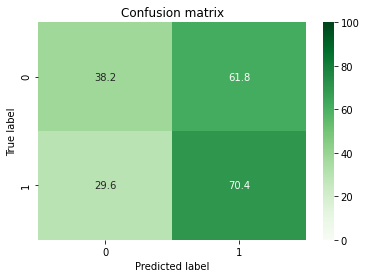

Learning rate:  7.7
              precision    recall  f1-score   support

           0       0.28      0.34      0.31       600
           1       0.76      0.71      0.73      1800

    accuracy                           0.62      2400
   macro avg       0.52      0.53      0.52      2400
weighted avg       0.64      0.62      0.63      2400



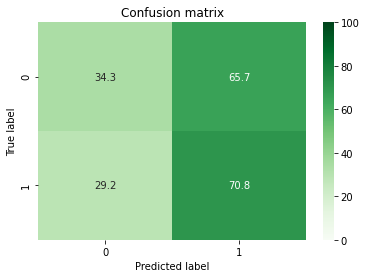

Learning rate:  10
              precision    recall  f1-score   support

           0       0.24      0.51      0.33       600
           1       0.74      0.46      0.57      1800

    accuracy                           0.47      2400
   macro avg       0.49      0.49      0.45      2400
weighted avg       0.61      0.47      0.51      2400



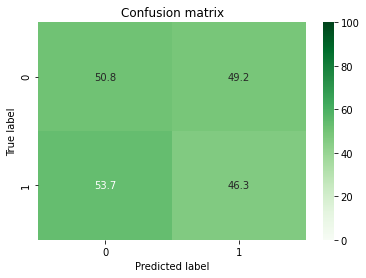

Learning rate:  20
              precision    recall  f1-score   support

           0       0.32      0.40      0.36       600
           1       0.78      0.72      0.75      1800

    accuracy                           0.64      2400
   macro avg       0.55      0.56      0.55      2400
weighted avg       0.67      0.64      0.65      2400



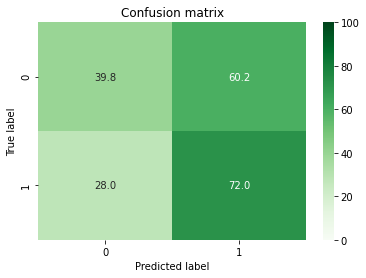

Learning rate:  30
              precision    recall  f1-score   support

           0       0.22      0.48      0.30       600
           1       0.71      0.43      0.54      1800

    accuracy                           0.44      2400
   macro avg       0.47      0.46      0.42      2400
weighted avg       0.59      0.44      0.48      2400



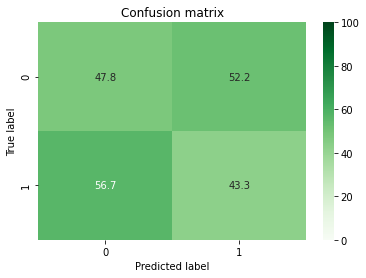

Learning rate:  45
              precision    recall  f1-score   support

           0       0.31      0.34      0.33       600
           1       0.77      0.75      0.76      1800

    accuracy                           0.65      2400
   macro avg       0.54      0.55      0.54      2400
weighted avg       0.66      0.65      0.65      2400



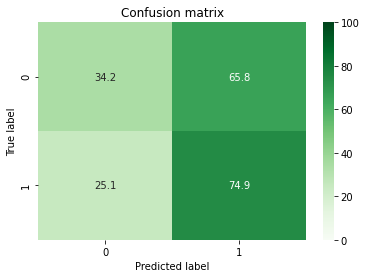

Learning rate:  55
              precision    recall  f1-score   support

           0       0.27      0.36      0.31       600
           1       0.76      0.67      0.71      1800

    accuracy                           0.59      2400
   macro avg       0.51      0.52      0.51      2400
weighted avg       0.64      0.59      0.61      2400



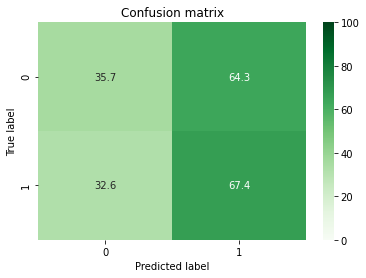

Learning rate:  62
              precision    recall  f1-score   support

           0       0.29      0.40      0.34       600
           1       0.77      0.67      0.71      1800

    accuracy                           0.60      2400
   macro avg       0.53      0.53      0.53      2400
weighted avg       0.65      0.60      0.62      2400



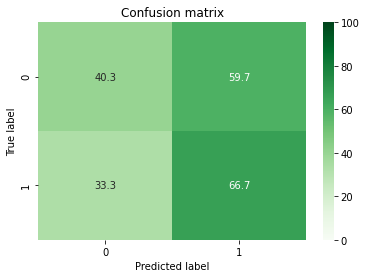

Learning rate:  77
              precision    recall  f1-score   support

           0       0.23      0.42      0.30       600
           1       0.73      0.53      0.62      1800

    accuracy                           0.51      2400
   macro avg       0.48      0.48      0.46      2400
weighted avg       0.61      0.51      0.54      2400



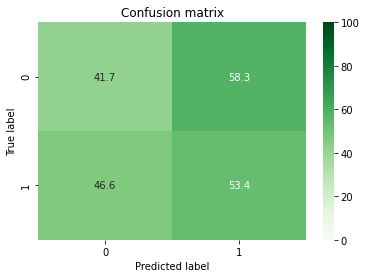

Learning rate:  84
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       600
           1       0.78      0.73      0.75      1800

    accuracy                           0.64      2400
   macro avg       0.55      0.55      0.55      2400
weighted avg       0.66      0.64      0.65      2400



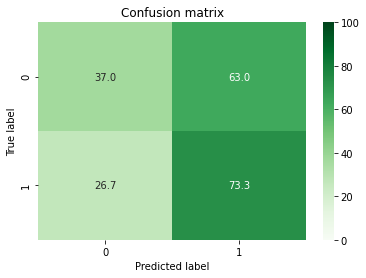

Learning rate:  90
              precision    recall  f1-score   support

           0       0.26      0.54      0.35       600
           1       0.76      0.48      0.59      1800

    accuracy                           0.50      2400
   macro avg       0.51      0.51      0.47      2400
weighted avg       0.64      0.50      0.53      2400



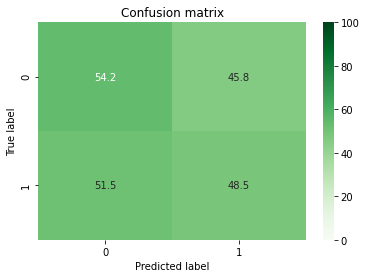

In [48]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=10, max_depth=10, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["0", "1"])
    plt.show()

In [54]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [51]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [75]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=xtrain, y=ytrain)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_val,y_val)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.01],
    'n_estimators': [3000],
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=xtrain, y=ytrain, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 17.8min finished


[0]	validation_0-auc:0.632014
Will train until validation_0-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.786445
[1000]	validation_0-auc:0.79996
[1500]	validation_0-auc:0.807212
Stopping. Best iteration:
[1774]	validation_0-auc:0.813029



({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 3000,
  'reg_alpha': 1,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.7950579164723771)

In [76]:
predicted_values = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      0.32      0.43       600
           1       0.81      0.95      0.87      1800

    accuracy                           0.79      2400
   macro avg       0.73      0.63      0.65      2400
weighted avg       0.77      0.79      0.76      2400

Accuracy: 0.78875


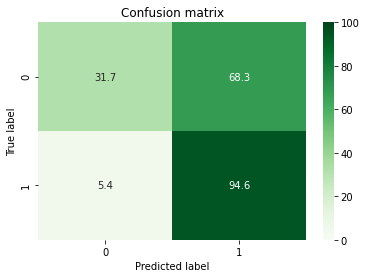

In [77]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [158]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier((20, ), max_iter=100000).fit(X_train_u, y_train_u)

In [159]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.53      0.52      0.53       600
           1       0.84      0.85      0.84      1800

    accuracy                           0.77      2400
   macro avg       0.69      0.69      0.69      2400
weighted avg       0.76      0.77      0.77      2400

Accuracy: 0.76625


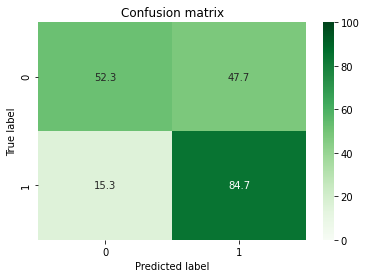

In [160]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50       600
           1       0.83      0.88      0.85      1800

    accuracy                           0.77      2400
   macro avg       0.69      0.67      0.68      2400
weighted avg       0.76      0.77      0.77      2400

Accuracy: 0.7725


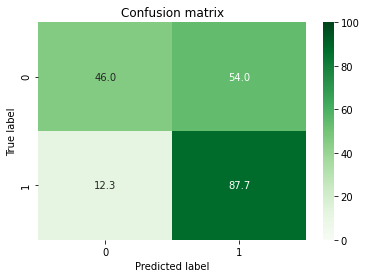

In [86]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.58      0.43      0.50       600
           1       0.83      0.90      0.86      1800

    accuracy                           0.78      2400
   macro avg       0.71      0.67      0.68      2400
weighted avg       0.77      0.78      0.77      2400

Accuracy: 0.78125


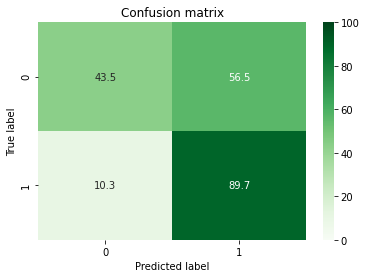

In [90]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.56      0.49      0.53       600
           1       0.84      0.87      0.85      1800

    accuracy                           0.78      2400
   macro avg       0.70      0.68      0.69      2400
weighted avg       0.77      0.78      0.77      2400

Accuracy: 0.7770833333333333


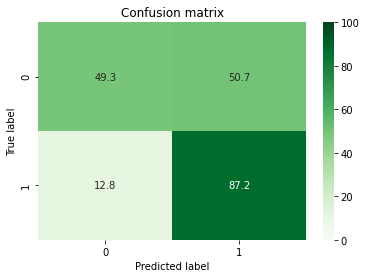

In [97]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

Undersampling со RandomUndersampler

In [121]:
from collections import Counter
# from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

undersample = RandomUnderSampler(sampling_strategy=0.5)
X_train = xtrain
X_over, y_over = undersample.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({1: 5600, 0: 2800})


In [122]:
final, targets = shuffle(X_over,y_over,random_state=0)
X_train_u  = final
y_train_u  = targets
X_test = df_test.values.tolist()
print('Training set class distribution %s' % Counter(y_train_u))
print('Testing set class distribution %s' % Counter(y_test))

Training set class distribution Counter({1: 5600, 0: 2800})
Testing set class distribution Counter({1: 1800, 0: 600})


([<matplotlib.patches.Wedge at 0x7fd6bea40550>,
 [Text(-0.5500000594609755, 0.9526279098330699, '1.0'),
  Text(0.5500001486524352, -0.9526278583383436, '0.0')],
 [Text(-0.30000003243325934, 0.5196152235453108, '67%'),
  Text(0.30000008108314646, -0.5196151954572783, '33%')])

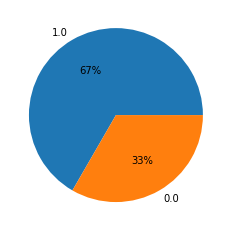

In [123]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_u).values()], labels=[float(k) for k in Counter(y_train_u).keys()],
           autopct='%1.0f%%')

Oversampling со SMOTE

In [126]:
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
# X = df_train.values.tolist()
counter = Counter(ytrain)
print('Original dataset shape %s' % Counter(ytrain))
oversample = SMOTE(sampling_strategy=0.7)
X_train_o, y_train_o = oversample.fit_resample(xtrain, ytrain)
print('Resampled dataset shape %s' % Counter(y_train_o))

Original dataset shape Counter({1: 8400, 0: 2800})
Resampled dataset shape Counter({1: 8400, 0: 5880})


([<matplotlib.patches.Wedge at 0x7fd6b9909e10>,
 [Text(-0.30102937065636565, 1.0580081842794187, '1.0'),
  Text(0.30102946971423916, -1.0580081560950105, '0.0')],
 [Text(-0.16419783853983577, 0.5770953732433193, '59%'),
  Text(0.16419789257140316, -0.5770953578700057, '41%')])

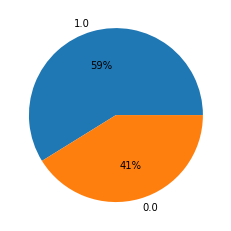

In [127]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_o).values()], labels=[float(k) for k in Counter(y_train_o).keys()],
           autopct='%1.0f%%')

Комбинација: Undersampling на majority, Oversampling на minority

In [128]:
from imblearn.pipeline import Pipeline
print('Original dataset shape %s' % Counter(ytrain))
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)
X_train_ou, y_train_ou = pipeline.fit_resample(xtrain, ytrain)
counter = Counter(y_train_ou)
print('Resampled dataset shape %s' % Counter(counter))

Original dataset shape Counter({1: 8400, 0: 2800})
Resampled dataset shape Counter({1: 5600, 0: 3919})


([<matplotlib.patches.Wedge at 0x7fd6bf7a5510>,
 [Text(0.30123471196054497, 1.0579497380830754, '0.0'),
  Text(-0.3012348110129466, -1.0579497098794415, '1.0')],
 [Text(0.16430984288756995, 0.5770634934998592, '41%'),
  Text(-0.16430989691615266, -0.577063478116059, '59%')])

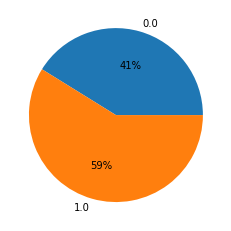

In [129]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_ou).values()], labels=[float(k) for k in Counter(y_train_ou).keys()],
           autopct='%1.0f%%')

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train_u, y_train_u)
nbc.fit(X_train_u, y_train_u)
rfc.fit(X_train_u, y_train_u)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.37      0.50      0.43       600
           1       0.81      0.72      0.76      1800

    accuracy                           0.67      2400
   macro avg       0.59      0.61      0.60      2400
weighted avg       0.70      0.67      0.68      2400



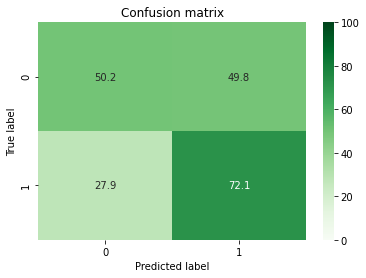

In [148]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.40      0.39      0.40       600
           1       0.80      0.81      0.80      1800

    accuracy                           0.70      2400
   macro avg       0.60      0.60      0.60      2400
weighted avg       0.70      0.70      0.70      2400



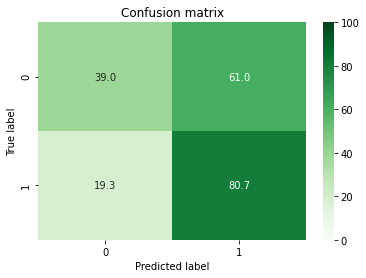

In [149]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.54      0.38      0.45       600
           1       0.81      0.89      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.68      0.64      0.65      2400
weighted avg       0.74      0.76      0.75      2400



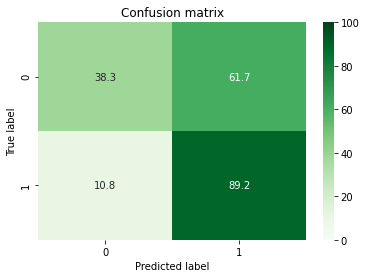

In [150]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

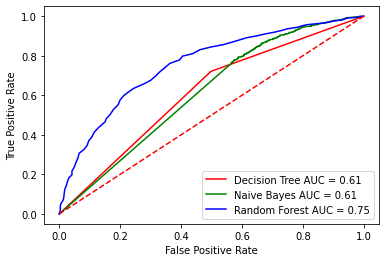

In [151]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)


# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
import keras
from keras.models import Sequential 
from keras.layers import Dense   
from tensorflow.keras.callbacks import EarlyStopping

In [162]:
X_val, X_test_ann, y_val, y_test_ann = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_u)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test_ann)

In [175]:
classifier = Sequential()

classifier.add(Dense(64, activation='relu', input_dim=768))

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))


classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['mse'])
es = EarlyStopping(monitor='mse', mode='min', verbose=1,patience=10)
history_callback = classifier.fit(X_train_norm, y_train_u, epochs=500, batch_size=64,validation_data=(X_val_norm,y_val), callbacks=[es])

Epoch 1/500
132/132 [==============================] - 1s 3ms/step - loss: 0.6020 - mse: 0.2064 - val_loss: 0.5641 - val_mse: 0.1892
Epoch 2/500
132/132 [==============================] - 0s 2ms/step - loss: 0.5263 - mse: 0.1751 - val_loss: 0.5282 - val_mse: 0.1747
Epoch 3/500
132/132 [==============================] - 0s 2ms/step - loss: 0.4714 - mse: 0.1538 - val_loss: 0.4653 - val_mse: 0.1487
Epoch 4/500
132/132 [==============================] - 0s 3ms/step - loss: 0.4294 - mse: 0.1386 - val_loss: 0.5085 - val_mse: 0.1642
Epoch 5/500
132/132 [==============================] - 0s 2ms/step - loss: 0.3878 - mse: 0.1227 - val_loss: 0.5004 - val_mse: 0.1624
Epoch 6/500
132/132 [==============================] - 0s 3ms/step - loss: 0.3463 - mse: 0.1088 - val_loss: 0.5199 - val_mse: 0.1573
Epoch 7/500
132/132 [==============================] - 0s 3ms/step - loss: 0.2973 - mse: 0.0913 - val_loss: 0.5704 - val_mse: 0.1717
Epoch 8/500
132/132 [==============================] - 0s 3ms/step - 

In [188]:
probs       = classifier.predict(X_test_norm)
preds       = probs > 0.9
print('Neural network score on test:\n',classification_report(y_test_ann, preds))

Neural network score on test:
               precision    recall  f1-score   support

           0       0.46      0.61      0.53       423
           1       0.85      0.76      0.80      1257

    accuracy                           0.72      1680
   macro avg       0.66      0.69      0.66      1680
weighted avg       0.75      0.72      0.73      1680



[]

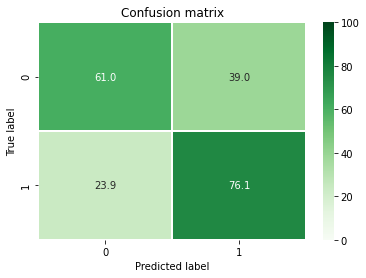

In [189]:
cm=confusion_matrix(y_test_ann,preds)
names = ['0', '1'] 
cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  
 

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sns.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Greens')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()